<a href="https://colab.research.google.com/github/falilo/CMP414ArtificialIntelligence/blob/main/Home_Work_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np  # scientific computation
import pandas as pd  # data handling
import matplotlib.pyplot as plt  # plotting
# The following "magic command" allows figures to be displayed automatically in notebook
%matplotlib inline 

In [ ]:
raw_data = pd.read_csv("average-height-of-men-for-selected-countries.csv", sep=',')
raw_data.head()

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
0,Afghanistan,AFG,1870,168.4
1,Afghanistan,AFG,1880,165.7
2,Afghanistan,AFG,1930,166.8
3,Albania,ALB,1880,170.1
4,Albania,ALB,1890,169.8


In [ ]:
# Let create a filter where the Entity is equal to United Kingdom
filter1 = (raw_data['Entity'] == "United Kingdom")
print(filter1)

0       False
1       False
2       False
3       False
4       False
        ...  
1245    False
1246    False
1247    False
1248    False
1249    False
Name: Entity, Length: 1250, dtype: bool


In [ ]:
filter1 = (raw_data['Entity'] == "United Kingdom")
data = raw_data[filter1]
data.head()

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1176,United Kingdom,GBR,1810,169.7
1177,United Kingdom,GBR,1820,169.1
1178,United Kingdom,GBR,1830,166.7
1179,United Kingdom,GBR,1840,166.5
1180,United Kingdom,GBR,1850,165.6


In [ ]:
# Let extract the increased of height from 1900 to 1980
filter2= (data['Year'] >= 1900)
data = data[filter2]
data

,Entity,Code,Year,Human Height (University of Tuebingen (2015))
1185,United Kingdom,GBR,1900,169.4
1186,United Kingdom,GBR,1910,170.9
1187,United Kingdom,GBR,1920,171.0
1188,United Kingdom,GBR,1930,173.9
1189,United Kingdom,GBR,1940,174.9
1190,United Kingdom,GBR,1950,176.0
1191,United Kingdom,GBR,1960,176.9
1192,United Kingdom,GBR,1970,177.1
1193,United Kingdom,GBR,1980,176.8


In [ ]:
# Let set the year entity to become index of the data
data = data.set_index(['Year'])
data

,Entity,Code,Human Height (University of Tuebingen (2015))
Year,,,
1900,United Kingdom,GBR,169.4
1910,United Kingdom,GBR,170.9
1920,United Kingdom,GBR,171.0
1930,United Kingdom,GBR,173.9
1940,United Kingdom,GBR,174.9
1950,United Kingdom,GBR,176.0
1960,United Kingdom,GBR,176.9
1970,United Kingdom,GBR,177.1
1980,United Kingdom,GBR,176.8


In [ ]:
# Let drop irrelevant columns of the data
data.drop(['Entity', 'Code'], axis=1, inplace=True)
data

,Human Height (University of Tuebingen (2015))
Year,
1900,169.4
1910,170.9
1920,171.0
1930,173.9
1940,174.9
1950,176.0
1960,176.9
1970,177.1
1980,176.8


In [ ]:
# Let rename the Human height columns
data = data.rename(columns={'Human Height (University of Tuebingen (2015))': "Height(cm)"})
data

,Height(cm)
Year,
1900,169.4
1910,170.9
1920,171.0
1930,173.9
1940,174.9
1950,176.0
1960,176.9
1970,177.1
1980,176.8


In [ ]:
# Let build a linear model 
# let calculate first the slope of two points (1900, 169.4) and (1980, 176.8)
#height = m  * year + b
m = (176.8 - 169.4)/(1980 - 1900)
print("Slope = ", m)

Slope =  0.09250000000000007


In [ ]:
# Let calculate Y-intercept of the point (1900, 169.4)
year = 1900
m = 0.0925
height = 169.4
b = height - m * year
print("Y-intercept = ", b)

Y-intercept =  -6.349999999999994


A linear model is : height = 0.0925 * year - 6.35

In [ ]:
# Let compute the mean square error of the model
# Fisrt let compute the error of each year
data.index

errors = []

for year in data.index:
   prediction = m * year + b
   y = data.loc[year,'Height(cm)'] 
   error = (prediction - y)**2
   errors.append(error)

print(errors)

[0.0, 0.3306249999999869, 0.0625, 2.9756249999999804, 3.240000000000041, 3.9006249999999776, 3.802499999999956, 1.500624999999986, 0.0]


In [ ]:
# the mean square error of the model
MSE = 1/len(errors) * sum(errors)
print("MSE= ", MSE)
print(np.mean(errors))

MSE=  1.7569444444444364
1.7569444444444366


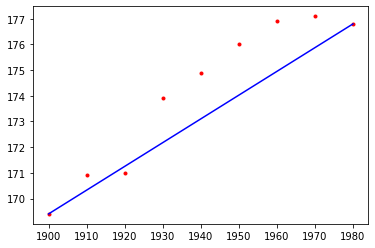

In [ ]:
# the model line together with the data points
# the data points
heights = data['Height(cm)']
years = data.index
plt.plot(years, heights, 'r.')

# the model line
years = np.array([1900,  1980])
heights = 0.0925 * years - 6.35 

plt.plot(years, heights, 'b-')